
# Fuzzy Inference Systems - XAI 2025

Author: Arthur Babey

Based on the work of Thibault Schowing, Hector Satizabal and Gary Marigliano

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2025: 
    - Arthur Babey (<a href="mailto:arthur.babey@heig-vd.ch">arthur.babey@heig-vd.ch</a>)
    
Due: 26 Mars 2025, 23h59

* We will mainly use an implementation of a library : lfa_toolbox in order to build, modify and visualize fuzzy system.
* You can have a look here at [lfa_toolbox](https://github.com/arthurbabey/lfa_toolbox) and dive into the code if needed.

The code is structured like this:
```
lfa_toolbox
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* GO LOOK in the code if you have any doubts to have a more precise idea of how it works. The code is rich but relatively simple!

## LFA Tools 

We will also use **LFA Tools**. This library makes it easy to visualize fuzzy systems, predictions, and all the characteristics of our fuzzy logic models.  

To install it, run:  

``` python
pip install git+https://github.com/arthurbabey/lfa_toolbox.git
```

---

# Build a fuzzy system step by step

## Part one:  simple example of a complete Fuzzy Inference System

In this lab you will first analyse an existing fuzzy system solving a relatively simple problem. Take your time to analyse the example and support thoroughly as you will be expected to understand it for part two. 

- Start first by reading and understanding the "**Fuzzy_Logic_Tutorial.ipynb**" notebook joined with this lab. It contains a detailed example with all the steps to create a fuzzy system from A to Z. 

- Read [this tutorial](https://ch.mathworks.com/help/fuzzy/fuzzy-inference-process.html) mentioned in the above mentioned notebook. It gives a greatly summarized explanation with comprehensive graphics, even though the vocabulary might be a little bit different.

- Make sure to be able to answer the questions bellow. You can write the answer / copy paste the definition here if it helps you: 

    - What is a linguist variable ?
    - ... a membership function ?
    - ... a Antecedent ?
    - ... a rule ?
    - ... the aggregation function ?
    - ... the defuzzification ?
    - ... the difference between a Mamdani and a Singleton Fuzzy System ?
    - ... a default rule ?

---
## Part two: implementation of the car acceleration problem

In [3]:
#%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from lfa_toolbox.core.lv.linguistic_variable import LinguisticVariable
from lfa_toolbox.core.mf.lin_piece_wise_mf import LinPWMF
from lfa_toolbox.core.mf.trap_mf import TrapMF
from lfa_toolbox.core.mf.triangular_mf import TriangularMF
from lfa_toolbox.core.mf.singleton_mf import SingletonMF

from lfa_toolbox.core.rules.fuzzy_rule import FuzzyRule, Consequent, Antecedent
from lfa_toolbox.core.rules.default_fuzzy_rule import DefaultFuzzyRule
from lfa_toolbox.core.fis.fis import FIS, OR_max, AND_min, COA_func, MIN
from lfa_toolbox.core.fis.singleton_fis import SingletonFIS

from lfa_toolbox.view.lv_viewer import LinguisticVariableViewer
from lfa_toolbox.view.fis_viewer import FISViewer
from lfa_toolbox.view.fis_surface import show_surface




### A) Basic implementation (Mamdani model)

In this exercise we will look into the car acceleration problem that you have seen in the lectures and transform it, step by step, into an **interpretable fuzzy system**. 

**Tip: While you are doing the exercises, you can compare your results with the surface plots shown in the lecture notes.**

The car acceleration problem is a problem where you need to decide which **action** between "**push**", "**release**" or "**nothing**" you must perform knowing the **speed** and the **speed change** (acceleration) of your car to maintain the same speed.

We can model this problem with this initial proposition:


<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAoMAAADlCAYAAAAoXP3gAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJzs3Xd8VFXawPHfncnMpIdUEhIgodcAQgCp0qsFFHUpYgMBe9nFfe2ry667uiLr6goiCisiigWsgEiRIhACCYGQ0NN7L1PP+wcQHRN6SZnn+/nwB7llnjvnzJ1nzj1FU0ophBBCCCGES3Kr6wCEENeOpml1HYIQQoh6RpJBIVyMPAwQQghxhqZp6Oo6CCGEEEIIUXckGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJgkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChUkyKIQQosFSSpGefpKC/Nyr+jrFxYUcP5aCw2G/qq8jRF2QFUiEEKKBU0qRknKAuLgdZGakooCQ4FCiWrWnV69+VFZWkJF+kg4doxvFkoQ2m40NG74hPn438fGxZGelMmXqbKZNm33O68vOzmDb1g2cOHEYgLBmzWnZsg09evTBZHKntLQYo9GEyeQOQHJyIj9t+JZDyYkcSNxHeLMI5i/4Hz4+ftfkOoW4ViQZFEKIBqwgP5e33vor27ZtwNcvgJhe/QkIDCYt7QTffvcFGorQpuHkF+Yyf/4y/Pz86zrky6ZpGiajieLCAjIz0jjfCot5edl8sGQB69d/i6+vDz17DSAoKIQjRw7x2coP8Pbx4+ZbJrN27ZfcfPNkRo26BQCj0YTBYOTokUPYbJZrcGVC1A1JBoUQooGqqCjn1b//H3vifmHQ4BE8/viLeHv7VG+3WMysX7+GRQvfwGKpIikpgT59BtVhxFeGXq9n8A2j6d6jD488/AfS09PPum/yoUReeeUJcnIyGTN2Evff/xheXr++R5WVFaxYsZhFC1/HbLaQciiRkSNvQtN0REa24Z57H0Gn1/G/ZQuvxaUJUSekz6AQQjRQCfG7Sdgfi79/IDNnPumUCMKplq2xY29j3ry38fVtws9b1jeqPm8mkztNmgSedXt6+kn+8pcnyMzMZNToiTz44NNOiSCAh4cnd9/9ILPnzMVoNHD0WDJWq7V6u6ZpNG3aDL3+ql1GnThyOIlVq5ayZ892lHLUdTiijknLoBBCNEBKKY4cPYTVakOv12FwM5x1346duvHYY8/z/pI3KSkppkmTgGsY6dWjaRr6s1y3xWJm0buvk52dTlhYONOmzcbtLPtqmo7RoyeSfCiR2D07KC8vw2g0VW930zeer0qlFGvXfsWCN1/GYjETGBDC2+98QkBgcF2HJupQ46nhQgjhQjRNIzAwBJ1OUVCQw/KPFnL/zCdwd/eodf/efQYR1aodfn5NgFN9DZOSEsjITCUzIxU3g5G77ppNYuJeduzYxJHDB0HT6NL5OsbfeDthYRG1nre8vJQNP35DYuJeTp48SkjTMNq368KQoWMIDb0yxxQVFbB27Vfs37+HvNxswsIiiO4Ww8CBI876/qSkHGRP3HZAx8CBowg8T7Lj5ubGHXfeR8L+WHJyMvH3P3uLY2lpMWvXfsWuXT9TkJeLt68f0dE9GT/+doKCmtbYPy3tOOvXryEl5SB5eVn4ePnRunUHhg0fT9t2nZwGvRQU5JGUlEBmRiqZWak4HIp7730Ug8HA5k0/sG37T2RkpOHu7k6HDtFMnDiVpk2b1Rqn2VzFhg3fsHv3NgoL8ggMDCEsLII9sduY/+YyACoryvEP+PVaL6U8RcOnf/HFF1+s6yCEENfGSy+9hHzkG48A/0B+2bGJwqICDiXvZ+NP31JQmI/RaKRJkwD0v2nR0jQNLy+f6sQjOeUAa1Z/zDfffMaBA3spyM/l6LFkjh5Npt/1Q2jfoSsF+bl8//0qfvj+S5q3iKJ58yinxOXQof08PXcWBw7Ec9PNd3LTTXcSFBTCV6tX8MmKxYSGhdOyZZvLOiYxcS9z/3Q/O3/ZTPfuMYwbfzvh4S1JOhDP4sVvkJeXjdlsplv3GLp1i0HTNJRSfPP1p+zZ8wtGo4Fp02YR1qz5ed9PHx9f/Pz88fL0Jjg4tPrvR48cYtu2DXj7+OHh6cW/Xn8Bh8NBz5796Brdk4OJe/npp+/Y9csWBgwcjqenFwA2m5X/Lfsv//rX87Rp3ZHRoycwatQEAgJD+O67VaxcuYSqqkq6d++NTneq11ZKciLffPspX3+9ksT9cRQU5BEV1ZZ/vPp/ZGdn0KXLdcTE9OfkyaNs+PFbdu7cTP/+Q/Hy8na6lqysNP7vz7PYsW0Td02fw913P0SXLj344YcvOXHyKDEx/enS5TqahoZXv9eXUp6i4XvppZdACSFcBvKRb3QOJO5VM2fcooYP66yGDe2khg3tpIYP66zGjrlOPf74dLX8o4UqNfVYrcc6HHa1aOHratjQLmrkiGj18fJFym63VW+3Wq3q/fcXqJEjuqg7Jg1xOk9OTqa6e/o4NXFCf3X06CGn8548cVRNum2gmjihv0pKSrjkY3JystTd08epUSO7q9WrVyiHw+F0zP79cWrK5BFq2NAu6sMP/1O93WyuUnPnzlDDhnZSEycOUNnZGRf9vv7W2h++VCNHdFHDh3VVDz30B3XkiHPsx46lqJtv6qtGjeyutmxe97vjotVDD96pKisrnGNP2KPGj+utbrm5nzpx4ojTNofDoT755H01fFhXNWpkV3XfvTep3bu3Ol1/Xl62mjx5pBo+rKtatWqp0/Hl5WVq7twZatTIruqzTz90Ou7IkUPqlpv7qMl/GK4yMlKr/34p5SkaB0DJABIhhGjAOnbqxpsLlvPkUy/TK6Y/RqMJpRRmcxXx+3axePF87rv3RubMvp1Nm35wGiygaToimkeh10Oz8OaMGz8Jne7XkRJubm5MnDCFZuEtyS/I47tvP0cpB0o5+PrrT0lLO0nbdp2IiIh0iik0LJy27bpQUlLE12tW4nDYL/oYu93G999/TlraSSKaRzJkyNgaLVJt2nQgpJZHpDabjZKSIgDcTe4YDMbLfJdPCWsWwcsvv0WrVu2c/h4U1BRfP3+UslFSeup1lVKUlBYDENE8qkYMIU3D8PD0wGyuJC8v22mbpmm0aNEKnU7D1y+Al1/5Dz179nO6fm9vX5o1i0ApRV5ejlO5HjuaTEJ8LAaDB926xzgdFxwcio+PHzk52fz883qUUpdUnqJxkT6DQgjRwLm7ezB69ARGj55AaWkJCQmx7IvbSWzcDk4cP4Ldbic5OZG/zXuagvxcbpkwpTpB0J9+PKmj9kd/Pr5+REf3Ii31OHFxO6isrARg184tgIOE+FjumjaqxnElJSUopTh58ghWqxW73X5Rx5SWlrDzl80opYiO7omnp+cFvx+apqE/ndTaHXbU+SYivEAGvR59LcOKdToNo9GIw6GhHKo6hokTpzFo0EgCA4Odkuzfx2q310yuzjw2NrgZau0HqmkaxjMJ5u+ur7AwH7vdisHg5jQQBkCv12E0eaCUIjszHVBUVlZedHmaTI1seLWLk2RQCCEaER8fX/r1G0K/fkMAyMhIZc3qFaxevQKzuYpVq5Yx+IbRBAQEXdD5NE1Hi+atAB0FhXlUVVWilIOC/DyU0hg3bhLT7pqDTld7MqnXu2EyuZOfn3NRx1SUl5Gbk42maYSFRZw1maqNm5sbTfxOjZiuqqyksrLigo+9kjRNq+57WFCQx4EDezlx/DDHjx8hPf0ExUWFuLld+a/h4JBQjEZ3rFYbhYX5tGjRqnqb2WymvKwYvR5aRrVB03RUVpZfdHmKxkUeEwshRAOUlZXOkiX/xmyuOud+zZo1Z+YDT3LX9Dno9TpKSgrJzEy74NfRNA13dw90OgUOQCkcDoXjdGuUzW7Dy8sLLy+fWv+dadW62GPsDjsOZQO46Me8bm4GukRfh6bpsVjMHDuWfFHHX0mJ++N4eu4Mpk4ZyaeffoCHpxc33nQHjz32An5+V2dZu8jINlzX43osFitbtqx1eqwbH7+b4uJiWkV1YPDgUy2Al1KeonGRlkEhhGiADAYDG3/6hrDQcEaNnnDOEZ6apiM6Ogaj0YTdbsdqvfCl1ZRSFBbm43BoePv6YjS5o2ng69eEwsJcCvJyz7scHICnp+dFHePu7omHhw8FBYXk5WahlANNu7D2C03T6NN7ECs+fp+ysmI2b15L3743XFArXHFxIcBlL9unfjOfn5eXF889/y/69h1cXU65uVlwgddzsUwmdx59/HlKyor5es1nVFVW0KVLTzIyUvnm28/oFdOfBx54Cl/fU9MMXWzZiMZHWgaFEKIB8vPzJyqyPe8vWUDSwfjz7p+Xm43FYsXLy/escwbWxmq1sD9xD+CgQ/vOeHp64uHhyXU9+qCUxrHjh6oHa/yeUg5stlOreVzsMR4enrTv0BlNUyTu34vFcnFrAzdv0YoRI25EKY2dv2whKen871F5eSnzXvkTixfPr7Uf38UoLMxn6dJ3sFis3DbpHqdE8GorKirgnbf/TlBgMIve+5wRI28BTaNT5+4sWPARL730JuHhLav3v5TyFI2LJINCCNEAubkZ6NnreoqL8nn22QfZvn3jWQdKFBUV8PGKRYCDYcPGEhxcc2Jkm92Bo5YEKDFxLwcS9+Ll5cO48Xeg0+nR6fSMv/F2AgL8ycpK57vvVtVY0kwpxddrVvL+4jdxOOwXfYxOpzF69ASMRhNHjiZz5EhSjdiOHz9MWuoJgNOtnb9ev16vZ+q0WURHX0d5eSmvv/48J04cOev7mZ+fw7x5c6moKue+ex91GihyZnk6m91R63vscCisFutv4jg14XNVZTnw62CQX/e3s3v3VsrLSlFKOS1/d4bFYkbTFFarDeWouVycUgrL6deyWM1O5/7f0nfYunUDgwaPonnzKLp1i2H06An07TuY8PAWNVpYL6U8ReMik04L4UJk0unGxWAw8tOGbzCbzWzevJaMjJOEhIQREBB4evJlB/v27eL115/ncEoig28YwwMP/NFphOmZCZWLi4tJPBBHi+ZRBAQE43DY2b59I6+99hxVVZVMv/shBg0aUd265evbhKCgUHbv2srevTvRgFat2mM0mqiqquTLLz/il52bmTXrj3h4eF3SMcHBYRQXF3DgQBwJCXto2aIVwcGh5ORksG7tapYt+w8Ws5nKqnJQMHDQCKdrM5nc6dN3MOlpJ0hM3MfGjd+haRoR4S1xd/c4PS1LNl9++RH/ePUZgoKb8vTTfyMg4NfVSqxWC59/voxjR1OwWm307Hl9jRU/Dh8+yLffrMRqtWA0mejXbyienl4cStpPaupR0lKP065dZwICgjh8+CDLlr7D4ZREyspLKS0txc/Xj+t6Xk9eXg4eHp44HIo1q1dw8OB+7HYrXbr2rDHdS3Z2Bp99uoTKynI0NAYOGoXJZMJms/Hd959z/FgKP/+8gV27f+ZwygHSUo9TVFSA3W7Hw8OzxiPzSylP0Ti89NJLaOpKjbkXQtR7Z1ZnEI1DRUU5c+fOYOzYWwkPb8nyj94lLm4HRqOJgIAgCgryqKqy0KlzNFOnzqJXr341WoXWrf2K1157lmbNWjJ58gy++OKj6hY0m81G69btufMP9zNw4PBa++wl7o9j6Ydvs3ffTsCBt7cfer2OIUPHM3XqLHx8fC/rGKvVwurVK/j00w/Iz8tBp9Pw8PBkwIDh3DbpHhYseIX4fbtOjzoO59ln/0W79p2dXs9ut7Nt6wY+W/UhSQcTAAgKDqWqspySkhLatu3ATTfdybDh450Gq2za9AMfLPk3qaknAMfpwTTu9OjRhz/+aR46nY5XX/0/9sb9QkVF+emjdISHhzN16mx69urPwndf46efvsPhsKPXG2jRPJIpUx9gwMARbN/+E2+88RLFRUX4+PgS07s/gwaN4IMP/sOJ40dR6lQLnMnkTqfOPXj2mX/g4enFO/95lZ82fkd5+amWRU3TCAoKZvyNdzJ58gzi42P55z+eJTs7vcbnXdM0DAYjrdt0YOiQsYy/8Xana76U8hQNm6ZpkgwK4UokGWz8zOYqMjPTyMvNpol/AOHhLfHwOPscfWeSwYjwSOYv+B8+Pn6YzVXk5+fi7x94zmN/q7y8lPz8XIxGI0FBTXFzM1zRY+x2O7m5mdjtDkJCQi95Iuni4kLS009QWlKMj68fTZs2IyAg+Kr256uqqiQ/P4eAgOAa72dVVSW5OVk08Q+8YolWUVEBH3+0iMysk7Ro0Zqc3Cyys9LJzMyguDgPu/3UI2BN03PzTXcw56Gna0zdcynlKRomTdNkNLEQQjQmJpM7kZFtiIxsc1nnaHYBa/n+1pmpR67WMXq9ntDQCx/4cjZ+fv6XPVL4Yrm7ezgN2Pj9tuYtoq7Ya2VlpfHCC48wftztPDD7qRpJntlcRVJSAls2reW77z8nLm4H5eVl+Pg4T3NzKeUpGi5JBoUQwoWdaSd2IC3GDZ1Sis2b1lJZWcWgQSNrnajbZHKnW7cYOnToyonUoxQXFlzwlD2i8ZIaIIQQLkopRW5uFg6HRmV5BVVV557AWtRvmqbhHxBEaUkB8fGx5+wSkp2dQWZGGoMGj8LLSwaEuDrpMyiEC5E+g+KMrKw0dmzfxPLl71FQkIOm6ek/YAhjxtxKz57XSx+xBspqtbBy5RI+XfkBvfsMZMCA4UREROLj40tlZQW5uVnExm5n86a1DB06lqnTZtVYv1i4FhlAIoSLkWRQnJGcnEhCfCyO380n5+nhxfARN8r6sw1cQX4uO37ZxMED8RQU5lFWVoK3ty/BQSG0bduZQYNH1ugnKFyTJINCuBhJBoUQQvyWpmnSZ1AIIYQQwpVJMiiEEEII4cIkGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJisQCKEi7maa7AKIYRoeCQZFMLFyNQyQgghzpCpZYQQQgghXJwkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChUkyKIQQQgjhwiQZFEIIIYRwYZIMCiGEEEK4MEkGhRBXTUlJEaknj6GUo65DEUIIcRayAokQ4qyUUqSkHCAubgeZGakoICQ4lKhW7enVqx+VlRVkpJ+kQ8fo6mXuDh8+yIYN35KUlMCBxH1ENG/J/PnL8Pb2qduLEXUqOzuDbVs3cOLEYQDCmjWnZcs29OjRB5PJndLSYoxGEyaTex1Hennsdjt6vb6uw6ihPsZVWlpCQkIsdpvtrPtomoZOrycwMJjQps3waxJwDSN0HZIMCiFqVZCfy1tv/ZVt2zbg6xdATK/+BAQGk5Z2gm+/+wINRWjTcPILc5k/fxl+fv4AuOlP3VaOHjmIzWapy0s4p+zsDD7/fBkREZGMGTMRNzdDXYfUKOXlZfPBkgWsX/8tvr4+9Ow1gKCgEI4cOcRnKz/A28ePm2+ZzNq1X3LzzZMZNeqWug75kp08eZT//PtvvPDSfDw9veo6nGr1NS6bzUpy8n7WrfuanOx0lFJomoZ/QBAtIqLw8vbBbKkiLy+XtNTj2O12ukX35M7JM+jZ83qnddav9OfZ1e4PkgwKIWqoqCjn1b//H3vifmHQ4BE8/viLTi17FouZ9evXsGjhG1gsVSQlJdCnzyAAIqPaMmPG42hofPLJkrq6hHNSysGKFYv5es0neHh40qZNRzp2jK7rsBqd5EOJvPLKE+TkZDJm7CTuv/8xvLx+rUeVlRWsWLGYRQtfx2y2kHIokZEjb0LTGmYPpvKyUqz18AdQfY3L3z+Qu+9+mB49+vLnpx/AYrFyy4TJzJr1pxqtmFlZ6Xz44X9Yv+5rDhzcxxNPvsSwYePRNO2Kf55d8f7QMD9xQoirKiF+Nwn7Y/H3D2TmzCdrPOI1Gk2MHXsb8+a9ja9vE37esh6Hw169XdN0hIY2o549laqmaTo6d+6Ou7sX4c1aEhISek1f/8jhJFatWsqePdsbbX/K9PST/OUvT5CZmcmo0RN58MGnnRJBAA8PT+6++0Fmz5mL0Wjg6LFkrFZrHUV8eZRS7NmznaqqyroOxUl9jeu3goJC8PD0ws1No337LrU+zg4NDeehh/5Ml87dsVjMrFixmPLyMuDKf55d8f4gLYNCCCdKKY4cPYTVakOv12E4x+ORjp268dhjz/P+kjcpKSmmyW/68xgMxmsR7iUbPvxG+vcfhslkQqe7NlmrUoq1a79iwZsvY7GYCQwI4e13PiEgMPiavP61YrGYWfTu62RnpxMWFs60abPP+phN03SMHj2R5EOJxO7ZQXl5GUaj6RpHfHmUcrD15w18/sVHNA0Jq+twqtXXuH7Pzc2AXqeddz9PT2+69+hNwv448nKzKSkpqv6heqU/z652f5BkUAjhRNM0AgND0OkUBQU5LP9oIffPfAJ3d49a9+/dZxBRrdrh59fkol+rtLSYH9d/TVJSAidPHkXv5kZUVFuGDBlL9+4xaJqOvXt3smbNSpTj107mbgYjd9x+L6VlJTW3uRm4ZcIUIiPbsujd1ykuKajeptcbuGHIGDRNIyPjJJkZqbgZjNxzz8O4u3tQUJBHUlICmRmpZGal4nAo7r33UQwGA5s3/cC27T+RkZGGu7s7HTpEM3HiVJo2bVbrtZnNVWzY8A27d2+jsCCPwMAQwsIi2BO7jflvLgOgsqIc/4DAi37f6ruUlIPsidsO6Bg4cBSB5/kyc3Nz44477yNhfyw5OZn4+zu/JxdST4ArVn4Oh51dO3/mxw3fkJZ6HC8vL9q27cz4G+/g2LFk2rXrTHDwqdaiLZvX8d5788nISEUpO3abjX/8/f/Q6bXqetq6TYfqc6elHWf9+jWkpBwkLy8LHy8/WrfuwLDh42nbrpNTP7jLuZ6LjathUNUtnAY3NwwGY/V7VNvn+bcutEzPdb7GfH+QZFAIUUNMr/5EhEdy4uRRvlr9MTt3bWbwDWPo02cQ7dp1dmq50TSNkEtodUjcH8ff/jaXkpIi7rjjXm6bNJ2iwgK++PIj/vz0DIYMGcfDjzxD27Ydad++Mx9+8BZmcxV+fv78ae48WrRshcViplPHaD744D9UVpbh49OERx97ltatO2A0mhh34yQ+/ngxmzb+gLe3N/fe+whGo4k1q5eze/d2LBYzLVu0YurUB3B39yAt9Rjr1n3Fzl+2YDZXERwcSkzMAJYtfRt//0C6dYthwIDhrFu3ms9X/Y+dv2zmH/98rzoxOCMrK42/vPQEBfl5PPnHv9Cz5/UUFubz5psvk5N3qkWjZ89+l11O9ZFSip2/bKaiohKj0UCvXv0uqA9gs2bNueuuOTjsdqe/X2g98fT0viLlZ7Va+PeCv7J58/fcccf9TJnyADarld2xW/nz0zMoKy/noYf+zJAhYwHo2asf7dp35ofvv2DZsncJCg7lnvsewd3dA51OVz2wymazsvyjhXzxxTLGjbudO++8D3//QJKTD7Bs6dt8+dVybrttOvfe92j1Y9LLuZ4LjashKSzIZ9eun9E0RbsOXWnSxJ+DB+P5/rvPav08n3ExZZqWdvys52vU9wclhHAZF/ORP5C4V82ccYsaPqyzGja0kxo2tJMaPqyzGjvmOvX449PV8o8WqtTUY2c9/rtvV6mRI7qo++67WZWWljhty83NUndPH6fGjO6hfvjhS+VwOKq3lZeXqeeenaOGD+uq3nprnrLZbMpms6nXX39eDRvaRU267QaVk5NVvb/dblNvvTVPDRvaRU2ZPEIVFOQ5vdb+hD3q5pt6q9WrV1S/jsNhV4sWvq6GDe2i7r17vCopKare3+FwqE8+eV8NH9ZVjRrZVd13701q9+6tTjHm5WWryZNHquHDuqpVq5Y6vV55eZmaO3eGGjWyq/rs0w+djjty5JC65eY+avIfhquMjNQLKIWGx2yuUnPnzlDDhnZSEycOUNnZGZd8routJ0pdfvmtW7dajRndQ73+2vPKbrc5bTt58qi69+7x6r/v/EM5HPbqvzscDvX5qmVq+LCuavasSaq8vKzGtaz94Us1ckS0eujBO1VlZYXTtv0Je9T4cb3VLTf3UydOHHHadjnXcyFx1QdZWelq0m0D1aiRXdW6datr3SczM1U99+yc05/zkerY0eTqbef6PCt18WXqavcHQMkAEiFErTp26sabC5bz5FMv0yumP0ajCaUUZnMV8ft2sXjxfO6790bmzL6dTZt+uOCOzkop1q9bQ1raSVq3bs/AgSOcHo15enox6fZ7MRoNbNjwLWlpx9Hr9YwaNQFPTw9KSopITNxTvb9Op2fokLF4enpQWJhP8qH9Tq+XmZVG09BwbrhhdPXraJqOiOZRtQ5w0TSNFi1aodNp+PoF8PIr/6Fnz35OMXp7+9KsWQRKKfLycpyu/djRZBLiYzEYPOjWPcbpuODgUHx8/MjJyebnn9dz6j7cuNhsNkpKigBwN7lfct/RS6kncHnlp5SDxIQ4rFYLObmZWCzOI3CbN49i9oN/5mTqsYsa6KKUoqS0GICI5lE13pOQpmF4eHpgNleSl5fttO1y62NDYrMpVqxYzB//eH/1vyeeuJt77hnPfffezNGjh5k4cQoLFvyPyKi21ced6/N8KWXqivcHeUwshDgrd3cPRo+ewOjRE6oniN0Xt5PYuB2cOH4Eu91OcnIif5v3NAX5udwyYYrTza02ZnMV23dsRClFly7X4e5ec5LhFi1a0cQ/iJzsTGJjt9GyZWuiotrSMrINSQfj2bjhewYMGF49KOFk6jEslirsdgcbN/1Ar5gB6PV6bDYr27dvZNDAkXh7+zq9hl539t/CutPbDG6GWvtKapqG8cwX+u9u2IWF+djtVgwGtxoDIfR6HUaTB0opsjPTAQWcv+N8Q6JpGvrTHe7tDvslf6Fdaj2Byyk/jYjmkeh0Grt3bWfmzFu5vs9gunWPoXPn7vg1CaBnz760bt3+opJcTdOYOHEagwaNJDAw+KwDEjRNw/67x+SXdz0Ni15/qotK9+69ASgvL2PhotfJz8shLCycf7625Kx98M7+eb60MnW1+4Mkg0KIC+Lj40u/fkPo128IABkZqaxZvYKfRYjTAAAgAElEQVTVq1dgNlexatUyBt8wmoCAoHOep7KyguzMDDRNIzQsotb+ZEajiQD/IHKy0zlyOAmHw46HhydDhowh6eB+DiTtIy8vh9DQcMzmKjZvXkvPXgPYvWsLCfG7KS4qICAwmPz8XFJPHOXu6Q+dN0m9UoJDQjEa3bFabRQW5tOiRavqbWazmfKyYvR6aBnVpsHOp3cubm5uNPE7Naq8qrKSysqKSzrPpdaTyxn5qWkaY8beyrFjh1i/fg0Z6SdY9flSVn2+FL1eR2RkG/oPGMH4cZMuuj5pmlbdd6ygII8DB/Zy4vhhjh8/Qnr6CYqLCnFzc+2vZE3TaN2mA336Dv71bzqN1/75HBkZGSxc+C/mzv3rRY02v5pleinq6/2h8d2JhBCXJSsrnSVL/o3ZXHXO/Zo1a87MB57krulz0Ot1lJQUkpmZdt7z22xWHOrU6N+zLY+l0+kwGE+1+lWZq1Dq1E29b98baOLnR0lxAbG7twGn5rOrrKxg+l0P4u3tR15eLgkJsQAkJMQS0bwlYc0iLvj6L1dkZBuu63E9FouVLVvWOs2/GB+/m+LiYlpFdWDw4FHXLKZryc3NQJfo69A0PRaLmWPHki/pPJdaTy6Xp6cXTz71Cv9+awV33nkfraLaodfrsNsdHDmSzLKlb/Pww5M5fizlos+duD+Op+fOYOqUkXz66Qd4eHpx40138NhjL+Dn53f5wTdCAweOYOjQcQBs/flH1q796qJbm69mmV6s+np/cO2fIUKIGgwGAxt/+oaw0HBGjZ5wzl/LmqYjOjoGo9GE3W7Haj3/Kgfu7p54eHhSUFBIcXFh9RJUv2W326mqrEApjaCgEHSn5yALCQklunsfNm/6no2bfmD4iBvZuvVH+vYdTGRUGzp37sb27ZvYuOl7YnoPZPv2TQwdNv6aLiVlMrnz6OPPU1JWzNdrPqOqsoIuXXqSkZHKN99+Rq+Y/jzwwFP4+l78VDwNgaZp9Ok9iBUfv09ZWTGbN6+lb98bLqjVq7i4EAA/P//LqieXymazsm/fLqKje9G2bSfatu3E/TOeoLi4kIT4WDZs+Jpt2zaRk5PJJyuX8Mc/vnxBLZHqN/PHeXl58dzz/6Jv38HV15ObmwWNsJX4SnBzM3DPPQ9zMCme48dSWLr0bTp16k6rVu0u6PirVaaXqr7eH6T2CSGc+Pn5ExXZnveXLCDpYPx598/LzcZiseLl5UtY2Plb4Dw8PGnfIRpNU6SkHKi1j1RJSRF5eVkYjQa6Rf86j5ybm4ERI27EYDByOOUgycmJxMfHMnDgCIxGEwMHjUKv13EwMZ7k5EQKC/Po1i3m4t+Ey1BUVMA7b/+doMBgFr33OSNG3gKaRqfO3Vmw4CNeeulNwsNbXtOYrrXmLVoxYsSNKKWx85ctJCWdvx6Vl5cy75U/sXjxfOx2+2XVk0tltVpZseJ9Dv6u3vv5+TNg4HCee/4NHnn0GfR6HYWFeTgcNVuobFYrDofzAI7CwnyWLn0Hi8XKbZPucUoEr5Xa4qovftvSV1urX0BgMHPmzMXDw5vCgjzeemseFRVlF3TuK1GmV1J9vT9IMiiEcOLmZqBnr+spLsrn2WcfZPv2jWd9LFNUVMDHKxYBDoYNG0twcFPg1A39TCuh3W5zehTi5ubG+PG34+HhyYHEODIzUp3OqZRi184tlJQU0bp1e7r36O20vVOnbjQNbUZZWSlLl75NWFh49TyH0dG98PUNpKg4j6VL36Z7t5gaS+mdcWbkoM3uqHF9FosZTVNYrTZULV+gSiksp6/PYjVX/93hsPO/pe+wdesGBg0eRfPmUXTrFsPo0RPo23cw4eEtGmU/wd/T6/VMnTaL6OjrKC8v5fXXn+fEiSNn3T8/P4d58+ZSUVXOffeemmfvcurJpZafyWQitGkzFi36F4WF+TWO0zQNPz9/9HoDHTtEVz++1jQNg9GITqcoryjDYjE7HWc2V1FVWQ78OvjgDIfDzu7dWykvKz39uak5SvlSr+d8cdUXFosZq9WO3X5qXfTadO/emwkTJgM6EvfHsuLjxU73lbN9ni+1TF3t/tD470pCiIvWuct1eHp6UVVVySsvP8lr/3yWlJQDTlNw7N27k+eee4gjhw8y+IYxTLtrTvXjFavVwt59u3A4FIUFuaSmHnc6f5cuPZg6bTZlZWX87W9zSU09Vn3eLVvWsXjxmwQGNuWRR5/D09Pb6VgfH18GDhiBUoqkg/sYNmx89Q08MDCYrtE9sdsdHDuawsBBI2q9uZ6KbycOh6KgII/jxw9Xb7Pb7cTt2YHNpigrKyY55UCN4/PyckhLPYqmKQ4l7aesrKz62Jy8LMzmKl55+Y88+uhU/r3gFVZ9tpRt237i+PHD5+2L2Vj4+jbh+RfeoF+/oaSlnuSJx6ezcuUSiotOrQijlCI3N4uPPnqXmTMmAvDCC2/g95slDS+lnlxO+WmajjZtO5KSfJD/e3oWO3duqS4vpRSJiXt5b9EbtGvbmQkTpzq17rVq1Q6TyYP8/Dx++WUTSikK8nN5+eWnKCstpkuX6wAHX37xEfv378FqtXDo0H7mv/EXtm/bgI+vHxaLlT27t2GzWcnJycThsF/W9ZwvrmvRR+58lFIkxMdSWVkKONi98+daPyM6nZ5Jt99Dp87ROByKlSs/4MMP/kNFRfk5P8+XUqaueH/QVGOc6EoIUStN0y6o83VFRTlz585g7NhbCQ9vyfKP3iUubsep0ZsBQRQU5FFVZaFT52imTp3ltMrEpk0/8P7iBaSnnwQcaJqGu7s7vfvcwJNPvlj9pa2Ug507f+bTT5aQnHKQJk38qKo69Wu6T5+BTJn6AKGh4bXGd+RwEk8+OZ2WLdvw6j/ec5reYfPmtcz761x69uzLiy+9WWMKkE2bfuCDJf8mNfWEU3w9r+vPsBHj+fDD/3Di+FGUOtXqYDK506lzD5595h94eHrxzn9e5aeN31FeXlrdjy0oKJjxN97J5MkziI+P5Z//eJbs7PQa77WmaRgMRlq36cDQIWMZf+Pt9X4N58tlt9vZtnUDn636kKSDCQAEBYdSVVlOSUkJbdt24Kab7mTY8PG1vhcXU0927fqZd9997bLKL+lgAqvXfMLIETex7H//JSV5P01DI6isrMRSVcHosbdy223Ta6zgYbfb+ebrlfzvfwspLi4gIrwFbkYTt946jeHDx1NcXMS7//0nP/30HQ6HHb3eQIvmkUyZ+gADBo5g+/afeOONlyguKsLHx5eY3v0ZNGgEH3xwefXR4VDnjOtarbtbmxMnjjBv3h85fiwFu/3UD01N0/D3D6Dv9UN4+OFnatSJ5ORE/vznWRQXFaBpGh4eXvj4+JKdncXvP89P/ekVvL19OHhg3wWXqSveHzRNk2RQCFdyoclgbczmKjIz08jLzaaJfwDh4S3x8PC8InE5HHZycrLwcPdwahlqiIqKCvj4o0VkZp2kRYvW5ORmkZ2VTmZmBsXFeb/50tNz8013MOehp+v0C/laKi4uJD39BKUlxfj4+tG0aTMCAoIvuP9cXdQTi8VMbm4WHh5e+PsHnjdWm81GXl4W7u6eNKklxqqqSvLzcwgICK7x+amqqiQ3J4sm/oH4+PjWOPZynC8uV3KxZXol1cf7gySDQriYy0kGxfllZaXxwguPMH7c7YwbP6nGTdxsriIpKYEtm9by3fefE9q0GfMX/A8fH5lWRIjGrr7eHzRNk6llhBDiSlBKsXnTWiorqxg0aGStv+ZNJne6dYuhQ4eunEg9SnFhgUsMKBHC1dX3+4PchYQQ4grQNA3/gCBKSwqIj489ZwtsdnYGmRlpDBo8Ci8vr2sYpRCiLtT3+4M8JhbChchj4qvLarWwcuUSPl35Ab37DGTAgOFERETi4+NLZWUFublZxMZuZ/OmtQwdOpap02Zd1NJaQoiGq77eH6TPoBAuRpLBa6MgP5cdv2zi4IF4CgrzKCsrwdvbl+CgENq27cygwSOln6AQLqq+3R8kGRTCxUgyKIQQ4rc0TZM+g0IIIYQQrkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChbkB13QpFiFE3ZLPuxBCiN+qXoFERhiKq0VGsNYfmqbxYl0HIYRo9F58sa4jEBdKvaDkMbEQQgghhCuTZFAIIYQQwoVJMiiEEEII4cIkGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJgkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUDQ6JSVFpJ48hlKOug5FCCGEqPfczr+LENeWUoqUlAPExe0gMyMVBYQEhxLVqj29evWjsrKCjPSTdOgYXb3O7uHDB9mw4VuSkhI4kLiPiOYtmT9/Gd7ePnV7MaJe0ZpA6yFgONvPYAdUZUHRMSjOBoesoiiQeuMKTN4wqjkYfvtHB+w8Aqk25339m8ENfjVb03JOwJaKqxzoVSLJoKhXCvJzeeutv7Jt2wZ8/QKI6dWfgMBg0tJO8O13X6ChCG0aTn5hLvPnL8PPzx8AN/2pqnz0yEFsNktdXoKoxzQjBPSGzvdCi5DTf7RB4R7IzwaHB/hFQkAUqMOw+1XY9hGUS5VyaVJvGj+dATq2hCndoavp9B8VxP4IA7ZC1W/2NXhA55YwqTtEm8BWBZ/FwedpdRH5laEppZSmaSglP2XE1XGh9auiopyXXniMPXG/MGjwCB5//EWnlj2Lxcz69WtYtPANLJYqnn/hDfr0GVS9XSkH7y2azyefLCEyqrW0DNZC0zRerOsg6gH3G+DB9eCth+xHYdECsP9mu2c/GLMUurSC0s/gvalQIl/sLk/qzYV78cW6juDSRPSAA+OhyAIR7qCqYPZ/YWFxzX3Du8GBm2HPpzDsIDTUjknqBSV9BkX9kRC/m4T9sfj7BzJz5pM1Ejmj0cTYsbcxb97b+Po24ect63E4fr0Va5qO0NBm6PXXOnLR0FhTocIMOKA41vkLHaBiG6y5E/LN4DMRxo0ErS4CFfWK1JvGrygbSmyw/FtIsYHOHV4eA6G1FGRRDhTZYG9+w00Ez5BkUNQLSimOHD2E1WpDr9dhcDOcdd+Onbrx2GPPk5yyn5IS559rBoPxaocqGgFlAfvpu/fZGq0tCZBwDNBD+AyQmiWk3jR+DjtYFJRmwqx4sAAhbeHvUTUTJocdrA4oaeiZINJnUNQTmqYRGBiCTqcoKMhh+UcLuX/mE7i7e9S6f+8+g4hq1Q4/vyYX9TqlpcX8uP5rkpISOHnyKHo3N6Ki2jJkyFi6d49B00593Pfu3cmaNStRjl97DrsZjNxx+72UlpXU3OZm4JYJU4iMbMuid1+nuKSgepteb+Cmm++ka9eeFxWrqGN2KDndGVzvK7+cxQWSetM4KNi8Ab5sB7d7w53j4L8LYYe5rgO7OqSeinojpld/IsIjsdsdfLX6Y2bOuIXFi+ezf/8eLBbnT6CmaYSEhFUnbxcicX8cs2dN4v3336R580ieePIlpt/1IPn5ufz56Rn849VnqKgoA6Bt2460b9+ZX37ZwubN69i3bzfDho2nRctWtG3bkU4do9m1azubN68jLm4X/foPpXXrDnh4eDLuxkloOjc2b/6RPXt+oWvX62jTpuMVfa/ENeABzU8PFijfCta6jUY0FFJvGg17OTyxDvIUmALg3b7gWddBXSWSDIp6IyAwmKf++AqtW7cDICMjjY+XL+Lxx+5iwi39eOKJu/l4+SLS0o5f9Lnz8rJ57bXnKCjI46GHn2HylAdo06YjvWL688wz/6R374GsX/8NS5b8G7vdjpeXD7feehfDho8HdOj1Blq1ao/BYMTLy4cJE6cweswtgA4vLy+6deuNyeSOpmm0adORiROm4O3tyX33P8aNN92Jh0djvYU0Xv7ToVM4qBLYtRhs5z9ECKk3jUx6IryYeqpPYJfr4X7/uo7o6pBkUNQrHTt1480Fy3nyqZfpFdMfo9GEUgqzuYr4fbtYvHg+9917I3Nm386mTT9c0MTSSinWr1tDWtpJWrduz8CBI6rnJwTw9PRi0u33YjQa2LDh2+pkU6/XM2rUBDw9PSgpKSIxcU/1MTqdnqFDxuLp6UFhYT7Jh/Y7vWZmVhpNQ8O54YbRTq8l6jfNHfw6Q9d/wn3/ApMFDjwOu4/VdWSiPpN604jZ4f2vYZ8FdCZ4bhyEN8LMSfoMinrH3d2D0aMnMHr0BEpLS0hIiGVf3E5i43Zw4vgR7HY7ycmJ/G3e0xTk53LLhCnnTLjM5iq279iIUoouXa7D3d29xj4tWrSiiX8QOdmZxMZuo2XL1gBERbWlZWQbkg7Gs3HD9wwYMBy304NbTqYew2Kpwm53sHHTD/SKGYBer8dms7J9+0YGDRyJt7fv1XmTxJWhg/Zb4YUz/1dgL4XSNEh9G/YuhuQEkIm3hBOpNy6lMhdm7IIt/SEoCl5vA1OS6zqqK0uSQVGv+fj40q/fEPr1GwJARkYqa1avYPXqFZjNVaxatYzBN4wmICDorOeorKwgOzMDTdMIDYuotZ+h0WgiwD+InOx0jhxOwuGwo9Pp8fDwZMiQMSQd3M+BpH3k5eUQGhqO2VzF5s1r6dlrALt3bSEhfjfFRQUEBAaTn59L6omj3D39IWkVrO8ckDwUVu44/X8FdhedF05cBKk3LifuZ1jaGWY2gQljoP9J2FXXQV1BjbCxUzREWVnpLFnyb8zmqnPu16xZc2Y+8CR3TZ+DXq+jpKSQzMxzT/tus1lxqFM9d/RnmYRQp9NhMJ5q8asyV1VPG6FpGn373kATPz9KiguI3b0NgPT0k1RWVjD9rgfx9vYjLy+XhIRYABISYolo3pKwZhEXfP2i7igr2M2n/8kXurhAUm9ci6MKnvsOMh1gbAL/7Q/ejei3viSDol4wGAxs/Okbftrw7XlXK9E0HdHRMRiNJux2O1brue/E7u6eeHh4opSiuLiw1vPb7XaqKitQSiMoKASd7tdPeUhIKNHd+1Q/Djabq9i69Uf69h1MZFQbOnfuht1uZeOm76moKGf79k0MHTa++nGyEEKIhi/3MDx15NRk4+17w5zAuo7oypFkUNQLfn7+REW25/0lC0g6GH/e/fNys7FYrHh5+RIWdu4WOA8PT9p3iEbTFCkpB7Dbf79uAJSUFJGXl4XRaKBbdIzTo2Q3NwMjRtyIwWDkcMpBkpMTiY+PZeDAERiNJgYOGoVer+NgYjzJyYkUFubRrVvMxb8J4tr5zS96eZIvLpjUm8ZPO1XMtSZHDlj1LWytAp0R/jQamjaSLKqRXIZo6NzcDPTsdT3FRfk8++yDbN++8awthEVFBXy8YhHgYNiwsQQHNwVOjRo+00pot9uql6pzc3Nj/Pjb8fDw5EBiHJkZqU7nU0qxa+cWSkqKaN26Pd179K7xmp06daNpaDPKykpZuvRtwsLCCQkJAyA6uhe+voEUFeexdOnbdO8WI2si13OaBxj0gA7cL27ecuHCpN40fno3cNdDyFlGVFiKYObPUKrA06fxPCqWZFDUG527XIenpxdVVZW88vKTvPbPZ0lJOVA9fYxSDvbu3clzzz3EkcMHGXzDGKbdNQed7lQ/QKvVwt59u3A4FIUFuaSmHq8+d5cuPZg6bTZlZWX87W9zSU09Vn3OLVvWsXjxmwQGNuWRR5/D09O7Rmw+Pr4MHDACpRRJB/cxbNj46v6HgYHBdI3uid3u4NjRFAYOGnFRk2GLa0yDgLHge3pQecA94C1D6cT5SL1p/DToFQ3+bjC8E9T8JjgleSe8ld+4RotLVRb1RmhoOBHNWzF27K2Eh7dk+Ufv8tCDd5wa6RsQREFBHlVVFjp1juaVv75Dr179qpOuTZt+4P3FC0hPPwkoysvLeXru/fTucwNPPvkinp7eTJo0nZYtW/PpJ0t4cM4faNLEj6qqUy2JAweOYMrUBwgNDa81Nk3TMXjwKFavXk7Llm1o375L9TY3NwODB49k688/0qlTNBERkVf7rRKXyK0D3PElRLUF/elf9N4T4ZETkPE9rJwJFTV7EQgXJ/Wm8WvSAr6bCL38TiVGHQZBajT8tAP+8Av8dg0sZYVX18Cdd0FUXQV8hWlKKaVp2nk77QtxqS6nfpnNVWRmppGXm00T/wDCw1tekdU8HA47OTlZeLh74Nck4LLP11BomsaLdR2EEKLRe/HFuo5AXCj1gpKWQVG/mUzuREa2ITKyzRU9r06nP2sroBBCCOFKpGOTEEIIIYQLk2RQCCGEEMKFSTIohBBCCOHCJBkUQgghhHBhkgwKIYQQQrgwSQaFEEIIIVyYJINCCCGEEC5MkkEhhBBCCBcmyaAQQgghhAuTFUiEcDGyTJQQQojfkpZBIYQQQggXJsmgEEIIIYQLk2RQCCGEEMKFSTIohBBCCOHCJBkUQgghhHBhkgwKIYQQQrgwSQaFEEIIIVyYJINCCCGEEC5MkkEhhBBCCBcmyWADopQiPf0kBfm5dR2KEEIIIRqJBrccnVKKlJQDxMXtIDMjFQWEBIcS1ao9vXr1o7Kygoz0k3ToGI2maXUd7mWz2Wxs2PAN8fG7iY+PJTsrlSlTZzNt2uxGcX3nU1pawp7YbSQnH6CgMA+T0UjTpuF079GHdu06o9fraz0mISEWu81WY5unlxfduvUGIC5uB1WVlTX28fDwpHuP3ri5Ga78BYk6Y/KGUc3BqVQdsPMIpP6uqvg3gxv8av5azjkBWyqucqCi3pA64zpcvawbVDJYkJ/LW2/9lW3bNuDrF0BMr/4EBAaTlnaCb7/7Ag1FaNNw8gtzmT9/GX5+/nUd8mXTNA2T0URxYQGZGWkoVdcRXRslJUWsWLGYNatXYjQZ6dnzekKbhlNRXsbGTT/wwQcLiIxsw/S7H+H66wejab9+LG02K8nJ+1m37mtystNRSmEyuTNk6Fi6du2JUg4AUlOP8f23n3PseApKKTRNw9fPn/HjJtE1uqckg42MzgAdW8KU7tDVdPqPCmJ/hAFboeo3+xo8oHNLmNQdok1gq4LP4uDztLqIXNQVqTOuw9XLWlNKKU3TUPU8y6ioKOelFx5jT9wvDBo8gscffxFvb5/q7RaLmfXr17Bo4RtYLFU8/8Ib9OkzqA4jvrKKiwt55OE/kJ6ezl3TG1bL4MXWr+PHUpj31z9x4uRRbrl5MnfdPQcvr1/LWikH27dtZMGbr1BSWsSk2+9h2rRZNZK3fft28eenH8BisTJx4hRmz/mTU9IIsHHjd/z9b3PR6dy4ZcIUpk59AE9P78u63vpM0zR4sa6jqFsRPeDAeCiyQIQ7qCqY/V9YWFxz3/BucOBm2PMpDDsIjmsfrqgHpM64Dlcsa/WCajh9BhPid5OwPxZ//0BmznzSKREEMBpNjB17G/PmvY2vbxN+3rIeh8NeR9FeeSaTO02aBNZ1GFdddnYGL//lCU6cPMzEiVOZOespp0QQQNN09Os/lGee+ydGo4kVH7/HF198VN3id0ZQUAgenl7o9RAZ1aZGIpifn8OqVcto4hfE8y+8wYwZTzTqRFCcUpQNJTZY/i2k2EDnDi+PgdBaflsV5UCRDfbmN9wbvbh8Umdch6uWdYNIBpVSHDl6CKvVhl6vw3COx3cdO3XjsceeJzllPyUltaTyDZSmaegb+WNLq9XC4vfe4GTqMZo3b8Wdf7i/1j6BZ3Tu3J3x4ydhtztYsWIxx48fdtru5mZAr9PQNA2j0eS0LTMzjeeefYjKykr+/o+F9O07uMG0tIrL47CDRUFpJsyKBwsQ0hb+HlXzhuiwg9UBJQ39Ti8ui9QZ1+GqZd0g+gxqmkZgYAg6naKgIIflHy3k/plP4O7uUev+vfsMIqpVO/z8mgCn+homJSWQkZlKZkYqbgYjd901m8TEvezYsYkjhw+CptGl83WMv/F2wsIiaj1veXkpG378hsTEvZw8eZSQpmG0b9eFIUPHEBpa85iL3R+gqKiAtWu/Yv/+PeTlZhMWFkF0txgGDhxxie9ew3E45SA7dmwCdAwZOhZf3ybn3F+n0zNs+Hi++WYlxUVFfPXlch559Dl0urMnkAApKQd4+eWnaBrSlL88/XeCgppewasQDYaCzRvgy3ZwuzfcOQ7+uxB2mOs6MFFvSZ1xHS5W1g2iZRAgpld/IsIjsdsdfLX6Y2bOuIXFi+ezf/8eLBbn0tE0jZCQsOrHgqlpx/n++1W8v/hNvvrqY37eso4333yZ9evX0KtnPybeehdNQ8JYteoDZs+axNatP9bo43bo0H7mzL6Tzz5bxvX9hvDn/3uVESNuYuOmH5j1wCQ2bvzO6ZiL3R8gMXEvs2dN4sMP3iIkJJS773mYQYNHcfxoCo88PJkTv2v5akyUcrB9+0YqKipxdzfSrVvMBbXUNW3ajJCmzQAH++J3U15eds794/bs4Jln5pCfl83EW6dLIuji7OXwxDrIU2AKgHf7gmddByXqNakzrsOVyrpBtAwCBAQG89QfX2H+/Bc5ejSFjIw0Pl6+iBUfv4fRaKJ9h67E9OrPwEEjiIiIdDq2W7cYoqN7svi9+axYsYS8vBxaRbX7//buPL6pKnH/+OcmadN0oQtLgVJoBQoKgwu4gRuKyqYjuKAD6g/BdRzFHWdQcFwYdwbFr6KiA8IgDuIKOqgIgigIBaQyFCuFlrV7S2ma5Ob+/gCrtS2WtU3v8369+IPk3OSk5/T2ybnnnMtVw0ZWjSL16XMBbdq2Z/a/p/LCPx+nQ4eOVa+Tl7eTf0wcy549JTzz7DRSU9MASE5OpX3ycdxzz/W8MPlx2rRJpkuX7gddft977OKZp8dRVFTIn28fy+DBV1WFoXPPvZiMjDVMfOJ+SkqazqXvX/P7/WRuygCCRLg9JCYm1eu48PAIktq2J+vHjRQV5lFUVEBMTGyNcpZlsfjLT5g8+TEqKvbi9/uYMeMlunc/hZiYZkf400go2ZYBE3rC5PbQ/UwYvQ4mF8sIphkAABalSURBVDV0raQxU5+xD7u0dciMDMK++YD/nDyLe+59lF6n9iE83I1lWVRWelm3diWvvz6JUTdcwm23XsXixZ9WW1BgGA7aJafidELbpGQGDb6y2uVEl8vF0CHDaZvUgYLCfBbMfxfLCmJZQT766B1yc7fSOe2EGkGzdZskOqd1p7S0mI8+nINp+g+qfDBoYlkWn3zyLrm5W2mXnELfvgNrjIp16tR1/whY0xQIBCgtKQbAHeHB5arf9xSn00F0dCyGYWCaJiUlNX9LLcvi0wXzmDLlSW697QH+csffcDrDyPpxAx988O8aC0/EZkyY9hGs9YHDDQ8NgqSQOjPKMac+Yx82aeuQGRn8WUSEh/79h9C//5CqzYXXpq9gVfo3bMnOwjRNMjMzmPjEWAoL8rhsyPCqYOV07GtBB7VffoxpFkuPHr3IzckmPf0bKvZvSLxyxVdAkO/XreK6ay+ucVxpaSmWZbF1axZlZWUHVd7v9xMMBlnx7RIsy6JHj55ERjbVgei6ORwOwsL2LZAJmIFD3urIYdT8LQ0GLbbmbmbsgxM55ZQzqaz08tXihaz8binvvzeTPr3PJyW182HVX0JbRR7cuBK+6gMtUuHZTjA8s6FrJY2Z+ox92KGtQy4M/lpMTDN69+5L7959Adi+PYcPP5jNBx/MprLSy9y5Mzj3vP4kJLSo1+sZhoP2yccBDgqL8vF6K7CsIIUF+ViWwaBBV3LtdbfhcNQeJp1OF+XlZQdV3u2OoLAgj7zduzAMgzZt2v3uAoimyOVykdC8JYZhUOmtxOuteWeQ2pimSdmeEizLwuVyExtXc6Nxp9PByJF/4ZRTzgT2bdMzavQYNmaup6iokDffeJG/jnuqxopjsZf0pTC9G9wUB0MGQJ+tsLKhKyWNmvqMfTT1tg6Jwc6dO7fxxhsvUFnpPWC5tm2Tuenme7ju+ttwOh2UlhaxY0f9twQ3DIOICA8Oh7Vv0yDLIhi0CO4fpQqYAaKiooiKiqn1X0SE56DLA5hBk6C17343YWHhh/ATCn1Op4uTTzodh8PA5/OSs/Wneh1XWeklJycbgFaJicTH174X429/rsd1TGPo0BE4HAYrv1vK8q8XHVb9JfQFvfDQAtgRhPA4eLkPRGu3ITkA9Rn7aOptHRJhMCwsjC8XfcyiL+b/7uVDw3DQo8ephIe7MU0Tv99X7/exLIuiogKCQYPoZs0Id0cQGRlJs9g4DMOiMD/vd28Hd7DlASIiIvF4YrAsi/y8nbacw2YYBr1OPYvY2BZUVvr4evmiem0avnXLT+zetR3DcHL2WRfVe9Now3Bw6R+voWOn4/H5Kpn+rykUFRUc7seQEJf3I9ybBSbQ5TS4renv8y6HSX3GPppyW4dEGIyNjSc1pQvT3pjM/zas+93y+Xm78Pn8REU1q3PPwNr4/T7WZ6wGgnTt0o3IyEg8nkhOOfl0LMtgc/ZGSkuLaz3WsoIEAv6DLg/g8UTSpWs3DMMiY/0afL76B9impE2bJC69dBhOJyxf/mXViF9d/H4f77//b/buraBdcnsGDBxabeHNr7841PYlIiYmllGjxhAREcHWnC3MeXtak7prjdTBAIM6Tn5BmDsflnnBEQ7394fEkDhLylGlPmMfNm3rkPgYLlcYPXudSUlxAePG/Znly7+sc4SwuLiQf89+FQhywQUDadmy5j5yATNI0Kz5Rz8jYw0/ZKwhKiqGQYOH4XA4cTicDL7kKhIS4tm5cxsLFsytMXJnWRYffTiHaa//E+CgygeDJi6Xi/79hxAe7ibrp0yysv5Xo27Z2T+Sm7MFYP9oZ+O+l/ShMAwHl19xHWeecT6FBQW8+OITBwzTC+bPZcmS/5LQvDl33/0IzZu3qlbG56vE7zcxzX33tq7NiSeeymmnnwsE+fjjd1i5YumR/ljSyDhdEOGEVnXMmPYVw01LocyCyJimdSlIDo36jH3Yta1DIgwCdOt+CpGRUXi9FTz26D088/Q4Nm36oSpoWVaQNWtW8NBDt5P14wbOPW/A/sUbNRdjbNu2lYfH30HG+nQCgQCBgJ9lyz5n4sQHCAQCjLj2Frp27V5VPjk5lVtuHYvb7eGtGS8za+ZU9uwpA8DrreA///kXy77+gmHDbsDhcB50eYAePU5lwMChVFaW8/TT40hf/Q2BQICdO3OZ9+5bPPfsQzgMA8OwWL9udZ3hJtR5PJHcP/ZxBgwYwvfrVvLAfTeyYsVXBAKBqjLbt+cwefLjvPTSU7RN6sAjj0zmD3/oWe11LMvi+3WrqKgoA4KsWPFVrXNOHQ4Hia3aYFkGFRV7eeqpv7H4y080QthUGdCrB8S7oN8JUNekgswV8GJBU/zKJQdNfcY+bNzWhmVZlmEYh7yVx7Gyd285DzxwIwMHXk5SUgdmzXyF9PRvCA93k5DQgsLCfLxeHyd068GIEbfQq1fvqjuQ/Gzhf9/nmWfG0bZtB/70pxuZN28mW7ZkAfv2uevYsQtXXzOas8/uV+NYgIz16Uz/10usWbsCCBIdHYvT6aDv+YMZMeKWGpsXH2x5v9/HBx/M5p133qQgfzcOh4HHE8lZZ/XjiitHMnnyY6xbu3L/quMkxo17jrQu3Y7oz/loOJT+ZVlB0tO/Zc7b01i3bhXh4WHEJ7SkonwvxSX5dEhJo//FlzFw0BW43RHVjt2yJYsnnriP7M2bMM1gVR3iYuM56eQzuOvuCURGRrFu7UqefPKv7Nq1k+q3GXeQktqJp59+rc4FKaHKMAyY0NC1aBhx7WHBUOgV+8s2CsXFsOgbuOZb+O1dpmLbQ/p1kGrB31+B8fnHusbS0NRn7MPObW2Nt0InDNamstLLjh255OftIi4+gaSkDng8de/R93MYbJeUwqTJbxETE0tlpZeCgjzi45sf8NhfKy8vo6Agj/DwcFq0SMTlCjui5U3TJC9vB6YZpFWr1iG/wvhw+9eePWXk5mZTUlJEdFQMia3b6jZyh8jOYVBERGqyxluhvc+g2x1BSkonUlI6HdZrtG2bfFDH/Lw1zNEq73Q6ad26/gtfmrro6Bi6dv1DQ1dDRESkSQqZOYNHws9jU8EmdaVfRERE5NDZJgxalkVe3k6CQYOK8r14vQfewFpERETEDmwRBnfuzOX992bx/nuzsSyTgsJ8pkx5gm+/XVK115+IiIiIHYX0nMH6Ki0twTRNrrzq+mqP5+ftwjTN313QISIiItJU2SIMpqV1Iy2t8W/BIiIiInKs2eIysYiIiIjUTmFQRERExMYUBkVERERsTGFQRERExMYUBkVERERszBariUVE5DBNmNTQNRCRo2G8RgZFREREbE1hUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGdDs6aRTKykr5/vtVmIFAvY9xhYVx0kmn4fFEHsWaHZhpmjidzgZ7f6k/dzRcnAxhv34wCCuyIOc33S6+LZwXW/Pb8u4t8NXeo1xRaTSccTlc1LeQyAMOmxhYgXDyc+PJzk4gtyCM4LGqoBxRdm5vhUFpFAIBP5mZ61m48CN279qGZVmAg8TE1iQnp4BhUFSYR07OFny+SgCcThd33TWe/gOGNkidt279iSkvTGT8I5OIjIxqkDpI/TnC4PgOMPwk+IN7/4MWrPoczloG3l+VDfNAtw5w5UnQww0BL/wnHd7NbYiaS0NxhJfT6bT1XHnDas5qZWIAWA7Ktyey9n9xFJSGY0XtoU1SIcd3KSbaEUbWZ2fwzBMX8vriGPwN/QHkoNi5vQ3LsizDMPb/8RU58g6mf61du5IHx96M3+/jggsGc/c9jxAe7q56fs+eMpYt+5yZM6eyY/tWTuh2Ek8++SoREZ6jVf06bfhhLa+++hyPPf5SyIRBwzBgQkPXomG1Oxl+GAzFPmgXAZYXbn0ZppbULJt0IvzwR1j9DlywgSYxAnDIJkxq6Bo0EIu4895kw2drae0MY8OEOzjt78nssaqXieqYyc1Pz2LiZSWEVbbg9SF3ccsnUZgNVW05RPZrb8u6U3MGpXFp0aIVnsgoHA6DHj16VQuCANHRMVx88WW8+OIs+vW7hM0/ZbJx4/pjXk/Lsli9ejleb8Uxf285PMW7oDQAs+bDpgA4IuDRAdDaqKXsbigOwJoCmwdBWzPYm5NCXiUQdLNpYcvfBIN9ZcqzuvD89aN4/scwjIh8hj+3lE7uWl5OGjl7trfCoDQqLlcYToeBYRiEu6v/ZpmmSU7OZizLolmzOMbcNZ5zzr2YJYs/JRg8dt/HLCvIsqWf8+68mcfsPeXICZrgs6BsB9yyDnxAq87wj9SaJ8SgCf4glCoJ2lrQ58FXjz5glbVmzuJo/EBE2410jNYVt1Bkx/bWnEEJGdu3b2Xqy88w7uFncbsjcLsjuPvuCQA4HPsWceTmZvPZZx+yadMG8vN3EhMVS8eOXbmg32A6p52w7zLpbwSDJitXLOXzLz4mNyebqKgoOnfuxuBLhrF5cyZpad1o2bI1AF8tWchrr01i+/YcLMvEDAR46h9/xeE0cIWFM+yqG+jYqesx+5nIYbBgyRfwXhpcFQ1XD4KXp8I3lQ1dMQldQdzNTByA5YugLFDLcLM0IU2nvRUGJWRkZKyhvKK82mM/h8BAwM+smVOZN28GgwZdxdVXjyI+vjmZmT8wY/pLvPf+LK644npuGHVntdW/fr+PFyY/zpIlnzBs2GiGD7+ZgN/Pd6uW8eDYG9lTXs7ttz9I374DAejZqzdpXbrx6SfzmDHjFVq0bM3IUXcQEeHB4XAQGxt/7H4gctjMcrh7IZx/GbRIgFfOgDMXgxYMy6FwJmYy5uxynDjY/XUfNpQ1dI3kaGpK7a0wKI2SZVlsy91Cxvp0Kir2krkpg3lzZ9A2qX2t5Rd9MZ+ZM6eSlnYCI669tWpBSbt2KSS2asPYsbcwf/5cLu5/Ge3bH1d13OLFn/LZZx/Sr98lDLv6hqpw2bFTV3r3Pp8JD99B5sYMzjuvP4bhIDIyCo8nkpiYWADCw8Jo2bJ1yCwgkZq2ZcCEnjC5PXQ/E0avg8lFDV0rCS0WkZ02cN/rs7m8TRDv5l7c+eeu5Gt6QRPV9NpbYVAaJdOEhQs/5NsVSygpKaEgfweBgFlrGLQsi9KyfUtB2yWnEhYWXu35Volt8ER62FNWSn7+rqowaFlBMr5Px+/3sTtvBz6fr9qq5OTkVG7984PMm/cWfr+/xmIWaSJMmPYRjBoNJ7vhoUEwdxZsC+ETuxwlRgVnTnqdhSW/XA40wipp0aaY41LL8WW344Nne/PYo71YXaIp+SHPRu2tMCiNkstl8P9G3k6/fpcAkJOzmYkTH4Ba5vwZhsHQoddyzjkX0bx5y6rRvdrKmeavF5oYtEtOweEw+G7lcm666XLOPP1cTjzpVLp1O4nYuAR69jyDjh271AiY0rRU5MGNK+GrPtAiFZ7tBMMzG7pW0uhYYfw0pw+TNuw7HxjNtvLglP9yYrxFZXZv/nj6FSwqCt15Y/IbNmpvhUEJCcnJqYwceQdz3n691ucNw6ha5FFYmM8PP6xhS/aPZGdnsW3bFkqKi3C5XDWOGTDwcjZv3shnn33I9m1bmPvudOa+Ox2n00FKSif6nHUhgwddWevCE2la0pfC9G5wUxwMGQB9tsLKhq6UNDIudn3dlY+/jtj//y58H5nNd6/8jxYdvuHN57rRc/QJ5IfiZnNSC/u0d2iPa4qtpKR0pm1ShzqDWcb6dMY+cCMjhl/EO++8iScyiksuHcaYMeOJjY2t9ZjIyCjuufcxXnhxNldfPYrjUtNwOh2YZpCsrExmTH+Jv/zlT2Rv3nQ0P5o0AkEvPLQAdgQhPA5e7gPR+g4gB+Rky7+uYczH0QQMk/bDZzNlSKlGWZqsptveCoMSMlq2TOSuuybUmLtnWRaffvoe998/mp9+2shDDz/HpEkzGDr0Wnr06EV8QnMwanb1QMDPqlVfEwj46dz5BEbfeDdTX5vHnHeWMGHCPznnnAtxOsPYvXsHb89545juZSgNI+9HuDcLTKDLaXBb84aukTR6gVjevukq5u5wQlgpQ6e8zTXtdK5osppoeysMSqPy69vW1fcWdkVFBUyf/n/4fH6uuHIkZ5xxbr0u6/r9fmbPnsaGDeuqPR4bG89ZZ/fjoYef5447/4bT6aCoKJ9gsGZ9An4/waBWGoQUAwzqOPkFYe58WOYFRzjc3x8SdZYUI8jPZxRHLaeWwK7u3D66Jzk+A1erDUx68xtSNc04dNmwvXWak0bF56vE7zcxTdi7t/z3DwAqK7149+8/6HBU79LBoMl33y2jfE8ZlmXh9/9yK3G3203rxLa8+upzFBUV1HhdwzCIjY3H6Qzj+K49qvYnNAyDsPBwHA6L8r178Pm0S3Eocbogwgmt6ri24yuGm5ZCmQWRMbpULOD0lOFxAo4AcXEmNbuEg/xPLmPktAQqrSAJfT9k5p07iFTfCUl2bG+FQWk0LMvi+3WrqKgoA4J8t2IplZXe3z2uefOWdO9+ChDkvXkzWb9+NX6/j40b1zPp+b+z/OsviGkWi8/nZ/V3+y4L7969A8uy6NT5eDZlbuCvY29hxYqvqt7PsiwyMtbw2qvPk9a5G0OGjqg22njccWm43R4KCvL59tvFWJZFYUEejz56r+YXNmYG9OoB8S7odwJE11EscwW8WAChe3MpOWIMPx0Hfk9yBICPTiOzSKzti0QwkkVjR/B/m8KwHF7OeHwK797/I+3c6kUhxabtbViWZRmGUe9LciIHqz79a8uWLJ544j6yN2/CNINVx8XHJ3DeeQO55db76twyBvZdKn7l5adZtGgBwaCJ0xlG++QUho+4mbPOvpDlyxfx/POPUFJcTExMM049rQ9jxjzMluwsPvjwbS668FJmvPUymzLXk9i6HRUVFfi8e+k/8HKuuOL6GncWMU2Tjz+aw1tvTaWkpJB2Se1xhbu5/PJr6ddv8AHr2pAMw4AJDV2LhhHXHhYMhV6xv2yjUFwMi76Ba76F347vxraH9Osg1YK/vwLj8491jRuZCZMaugbHnKfrf3n3vcX07bwXt2P/OcxyUL6jFavmD2XozWkUVJslYhHT62O+Xvw53SMtwCCQ35Exp97KlOzGeU6QX9i1vS3rToVBOfqOZf/yeisoKNhNQkJLPJ7IGs/l7d5JXHxzYmKa1Xq8z1dJXt5OPJ4o4uOb/+7cw0AgQH7+TiIiIomLSzhin+NosXMYlMNkwzAoYgeWdWeTWBEtUiUiwkNSUoc6n0tun3rA48PD3XUeXxuXy0Xr1u0Oqo4iIiKNieYMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjVXdm1hEmj7dg1xERH7LBfoDISIiImJXukwsIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmP/H75Q1I/QUVXhAAAAAElFTkSuQmCC
" />

The figure above tells you which combination of inputs leads to which output. The goal here is to first implement a basic FIS and then to reduce its complexity to make it more interpretable.

**Read the code bellow that implements a basic Fuzzy Inference System and complete the comments**.

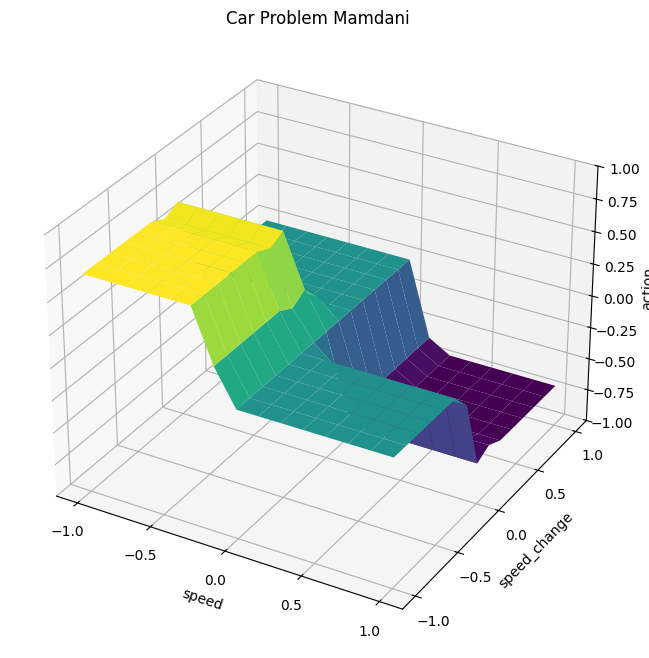

In [ ]:
# LV car_speed
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1])
})

# LV speed change
car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

# LV action
car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': LinPWMF([-1, 1], [0, 0]),
    'nothing': LinPWMF([-1, 0], [0, 1], [1, 0]),
    'push': LinPWMF([0, 0], [1, 1])
})

# Rules
car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN)
]

# Fuzzy Systems
fis = FIS(rules=car_rules, aggr_func=np.max, defuzz_func=COA_func)

# Surface 
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))
show_surface(fis, ax=ax, title="Car Problem Mamdani", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

## Questions 

- (1 pt) Why this system is a Mamdani FIS ?

- (1 pt) What is showing the surface plot ? is it before or after defuzzification ?

*Réponse:*
- Le système est un Mamdani FIS car il utilise des règles floues pour déterminer la sortie et utilise des entrée floues.

- Il montre la sortie de notre modèle selon les deux variable d'entrée après la défuzzification.

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /2 </b>
</div>

Commentaires: 

### B) Simplification with a Singleton model


The above example is a **Mamdani FIS**. In this section, you are asked to make a **Singleton FIS**. You can find the definition and example in the tutorial notebook joined with this lab. 



* Copy and paste the above implemented FIS system.
* Replace the defined linguistic variable __car_action__ with the following code:

``` python
car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': SingletonMF(-1),
    'nothing': SingletonMF(0),
    'push': SingletonMF(1)
})
```
* Convert Mamdani FIS to Singleton. To achieve this goal, replace __fis__ variable with the follwoing code:
``` python
fis = SingletonFIS(rules=car_rules)
```

* Use `show_surface()` function to display the result and compare it with the Mamdani FIS in a few words.
* Change the comments and the title of the surface plot accordingly.



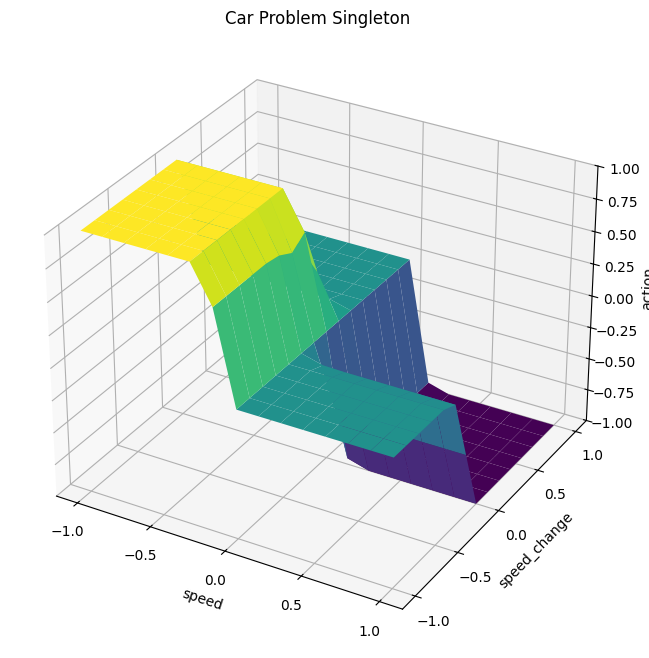

In [8]:
# Your code here
# LV car_speed
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1])
})

# LV speed change
car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

# LV action
car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': SingletonMF(-1),
    'nothing': SingletonMF(0),
    'push': SingletonMF(1)
})

# Rules
car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN)
]

# Fuzzy Systems
fis = SingletonFIS(rules=car_rules)

# Surface 
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))
show_surface(fis, ax=ax, title="Car Problem Singleton", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))



*Réponse:*
- Les valeurs de sorties sont moins tassées et avec moins de "bruit" que le modèle Mamdani.

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /6 </b>
</div>

Commentaires: 

### C) Simplification with a Singleton Model, Default Rule and Not Conditions


Use the FIS from the previous section (singleton & default rule), and change fuzzy rules to add **_NOT conditions_** in order to respect the following table. There are 3 distinct area (P, N and R), so there will be 3 rules (2 fuzzy rules and 1 default fuzzy rule).

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAB5CAYAAABfsGiyAAAABHNCSVQICAgIfAhkiAAACCZJREFUeJzt3X1sXXUdgPHn3NvbN8roytwGe2FzIxvvGHDAhgq+gAMTYIpCRoIgIIphoIZIItqILxAFFuMUxJFJAoEphIi8CChB2SS8jJcJxbG5zQ7moIO+rKW97b3HP1a021p+2+h67j17Pn/dc3OafLecPD33d885jeI4jpEkDakCIIqipOeQpJJV8d6LxgSHkLTrGhuTnmDvkUl6AEkqdYZSkgIMpSQFGEpJCjCUkhRgKCUpwFBKUoChlKQAQylJARXhXcpTVA/TTobcUL8KitD9H2hdC22boOgd75KGkN5QVkLDLDjsQpg8tv/NPnhnBWzeBMUa2G8KNEyFeDU8ez0svwM680lOLakUpTaUxTfh6avhpT/BZY9BXRY2fQtu/TkUBuxXOxvm3g6zF8MRc+E350G7sZQ0QOrXKHuboasHKELbc9tGEqBrOdx/DmzugX3nwemngM9SkjRQ6kMZ56FQ7H89xDpkfiWsXAtkYcLFUDli00kqB6kP5U4pQHvX1pfZUf6nSNqWTQCogUn9X/h0LoPeZKeRVGIMJTD6fDh0AsTt8Mxi6Et6IEklJbXfeodE1TBqGkz+Mpy6AKry8PKV8OzapCeTVGr2nlBmYMYy+P572zEUOqBjAzT/El5YDKtWgtedS9re3hPKIqz6JCx9qn87hoLXS0raCXtPKIG4Fwo9SU8hqdz4ZY4kBaQ/lANus/HPl0vaHakPZVQDuSyQger6pKeRVI7SHcoIGk6DUdVbNxsugLq9alVW0nBIbTYqZsKX7oOpB0O2/yN33Ty4fD288TAsvQS6tn9ChiQNIrWh7HsV7piZ9BSS0iDdH70laRgYSkkKMJSSFGAoJSnAUEpSgKGUpABDKUkBhlKSAgylJAUYSkkKMJSSFBDFcRxHUQSNSY8iSaXJM0pJCjCUkhRgKCUpwFBKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhSQ2j9Xq/SpqoNTJ0Fu4JtFeHoNNPdtu+/oA+Gk/XY8E3hzPfytaw8PqtQxlCobmRwcchDMPxqOqOp/M4bn/gwnLoPuAfvmauCwg+Dso+HIKujrht8/D/duSGJylTsfiqGyM/Ej8MrnoDUPE6sh7oav3Qy/bttx3wlHwStnwIrfwaeaoDjy4yoFXKNU2WndBO19cOeD8FofZKrh2rkwPhpk3zehtQ9e2GwktfsMpcpOsQD5GDo2wqUvQR4YezBcN3XHA7pYgN4itFtJfQCGUuUrhr/+Be7bAmTgnNNhVlXwp6RdZihV1gqd8M1HoSWGqga45XioTXoopY6hVNl7/WVobN66Bnn4CXDR6KQnUtoYSpW/Atz2R3gxD5kquOZ0mOCRrWHk4aRUePctuPgZeBcYMxVumA7ZpIdSahhKpcbzT8LtrRBn4Ky5MKc66YmUFoZSqVHshmsego1FqKyHm+dA3SDXVkq7ylAqVd5aDd9eAwVgxiz4+v5JT6Q0MJQqPxFEDHHwFuGeB2FZN2Qq4arPwjiPcn1AHkIqO9kKqM7C2CEe6ZJvhUuehI4Yavf147c+OEOp8hLBsUfC6Ar49KFQN8Ruq56GX2yGeESHU1oZSpWN+snw9wXwyEehCpj5cWheAPcet3V7oLgXrr8f1hWSmFRp42PWJCnAM0pJCjCUkhRgKCUpwFBKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhQwxPNXlDqNC5OeQCpbnlFKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhRgKCUpwFBKUoChlKQAQylJAd7rLWnYZOubOeXkt6l931OwiLivkpYNo1m3roENm3MUR2rA3WQoJQ2bTGUn02f9g7MvXMGJYwtEAHGGzjfG8eKr9WxuryTeZwsHTHibQ2a0UpfJseax4/nZjz/D4if2pTfpf8AQojiO4yiKoDHpUbRH+fQgjZiY+pOW0PTYi4zP5mhqvJxZP5jElnjbffaZtoqv/vROfnJmG7meMSw+60oufXgfCkmN/T5co5Q0zCK6mqfwVg9QrOK1Rz+0XSS37tO5ZgY3nf8VblqdI6puYf6NTzK9KoFxd4KhlDTsivka8jux8Bh3jGfpE3X0AtUH/pNpdTsUtSQYSkkJKlI1qkAGiPPVdPRFSQ80KEMpKTHZcau44mOdZMnQsnwOTR1JTzQ4QykpATG101/hu0vv4vMHFOleewwLLptJS4leJ+TlQZL2nOhdTli4mEfb/v+ROsr1MOaAVj48tZP8uon84YbZ/PDaY1nRVrrnbYZS0p4T5/jX0jksbKoEIBr1b65e9AhHjY7pWTebM477Ao+/U5rrkgMZSkl7UAWbls/kgeXV/dszWFm7jmdveZUxBz3FkhsP45iLDqWlFC+eHKB0z3UlpVCW9b89lyseqKMvKjB5/l0sOqu95M/YDKWkkdW3H3df8kXu2ZiFXDvzFt3NuRNL+5TSUEoaflGR91YeM4MsQfZtOpxvXHQMzfmIirFNLFzyFFMrR3TCXWIoJQ27bE0HNVkg00d9fYEdW5mh5eEzueC2BnriIg0n388dCzZSW6Lf6xhKScMr6mXaaSuZVA2QZ/oFaxg32CJksZbHv3Mev3otR5zp5vgfLeLeq1Yzsar0bmM0lJKGTc3MR3ioqZEVP3udugigyPh5S1i9/jqeuHUV+29XnGLbFL43/xO83BUR5bZw6nWLWLthEZdNKa01Sx+ztrfwMWvSbvOMUpICDKUkBRhKSQowlJIUYCglKcBQSlKAoZSkAEMpSQGGUpICDKUkBfzvFsY4Lr0b0SWpFPwXAxXvkmrRh/cAAAAASUVORK5CYII=
" />

* Copy and edit your singleton & default rule FIS to match the above figure.
* Use `show_surface()` function to display the result and compare it with the Mamdani model in a few words.
* Change title of the surface plot accordingly.

**Tip.** The following example shows how to make an antecedent negative:

- Car speed is fast: 
``` python
Antecedent(car_speed, 'fast')
```

- Car speed is **not** fast: 
``` python
Antecedent(car_speed, 'fast', is_not=True)
```

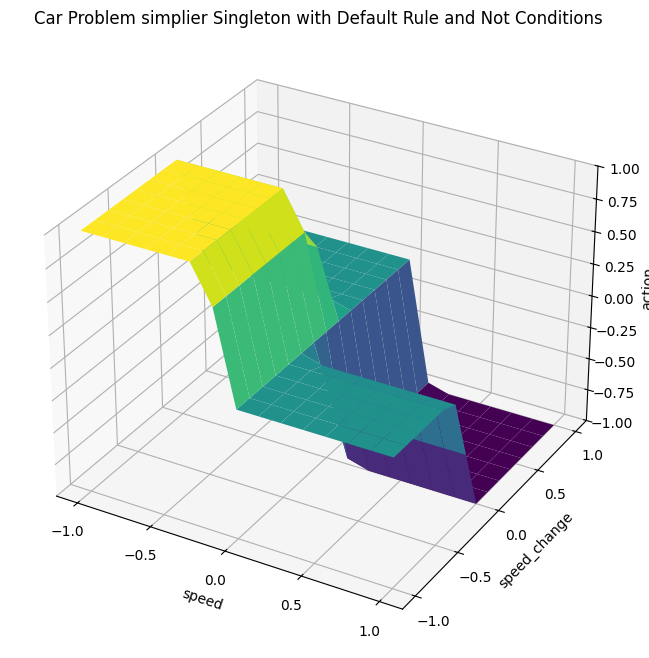

In [ ]:
# Your code here
# LV car_speed
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1])
})

# LV speed change
car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

# LV action
car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': SingletonMF(-1),
    'nothing': SingletonMF(0),
    'push': SingletonMF(1)
})

# Rules
car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'rising', is_not=True)],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'slowing', is_not=True)],
              cons=[Consequent(car_action, 'release')], impl_func=MIN)
]

default_car_rule = DefaultFuzzyRule(cons=[Consequent(car_action, 'nothing')], impl_func=MIN)

# Fuzzy Systems
fis = SingletonFIS(rules=car_rules, default_rule=default_car_rule)

# Surface 
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))
show_surface(fis, ax=ax, title="Car Problem simplier Singleton with Default Rule and Not Conditions", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))





### Compare the Different Models 

- (7 pts) Analyze and compare the 3 variants of the car problem with a few words. Specifically, ask yourself about the interpretability aspect, the performance/accuracy. What are the pros and the cons of each FIS compared to the original one (first one/Mamdani).
  
- (2pt) Which model (model A, B, or C) do you think is the simplest to be built by an algorithm? Justify your answer. 


*Réponse:*

Analyse des 3 modèles:
- Le modèle A est le plus complexe et le moins interprétable.
- Le modèle B est plus simple et plus interprétable que le modèle A.
- Le modèle C est le plus simple et le plus interprétable des trois modèles.

Les modèles B et C sont plus avantageux que le modèle A car ils donnent une réponse plus claire et plus précise.


Le modèle C est le plus simple à construire par un algorithme car il n'a que 3 règles. Il est aussi très dynamique dans le sens plus facile à modifier et à adapter.


---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /15 </b>
</div>

Commentaires: 

## Visualizing a fuzzy inference 

Let's take the "Singleton Model, Default Rule and Not Conditions" fuzzy system from the last question and visualize an inference. 
(If you did not find it, use the Mamdani model instead)


c:\Python312\Lib\site-packages\lfa_toolbox\view\mf_viewer.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  self._ax.plot([in_val, in_val], [0, mf_val], "r", c=self._color)


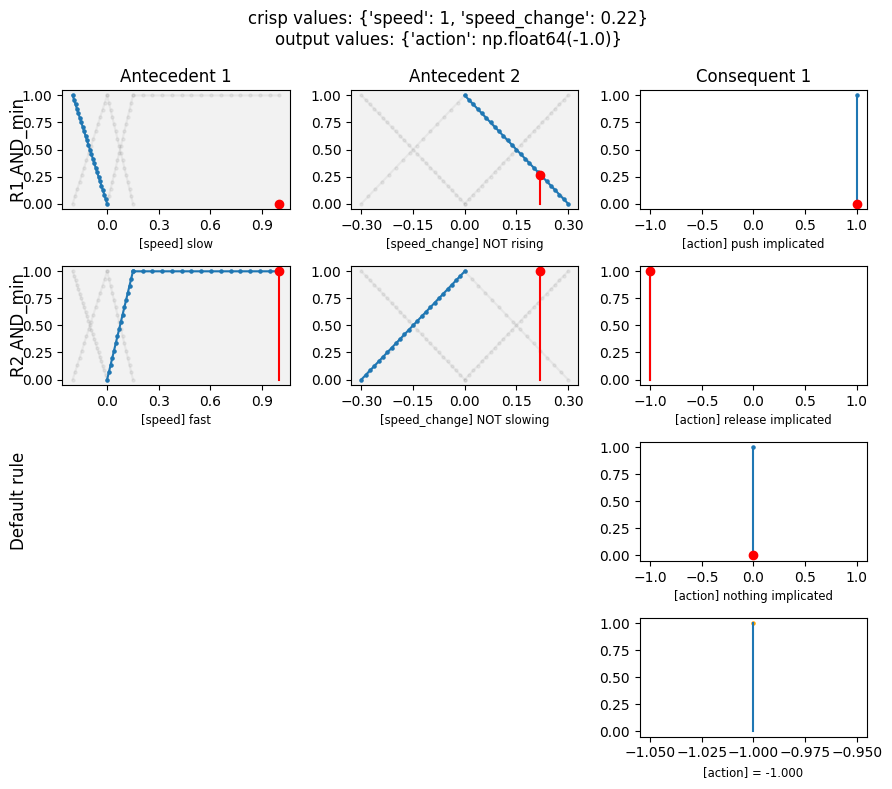

In [16]:
fis = SingletonFIS(rules=car_rules, default_rule = default_car_rule)

# data point
input_values = {'speed': 1, 'speed_change': 0.22}
# prediction
fis.predict(input_values)
# visualisation
fisv = FISViewer(fis)
fisv.show()

## Questions : 

- (1 pt) What is the system’s final output or prediction?

- (2 pt) Which rules are triggered and why? (which variables and membership functions lead to each rule’s activation?)

- (2 pt) Can you find a specific data point (speed, speed_change) such that the system’s output is “push” (i.e., action = 1)? Show it. 

*Réponse:*

- La sortie du système est -1 donc on relâche l'accélérateur.

- La règle R2 est activée : On ne ralentit pas et on va vite donc on relâche l'accélérateur.

- il nous faudrait input_values = {'speed': -1, 'speed_change': -1} pour avoir une action = 1.

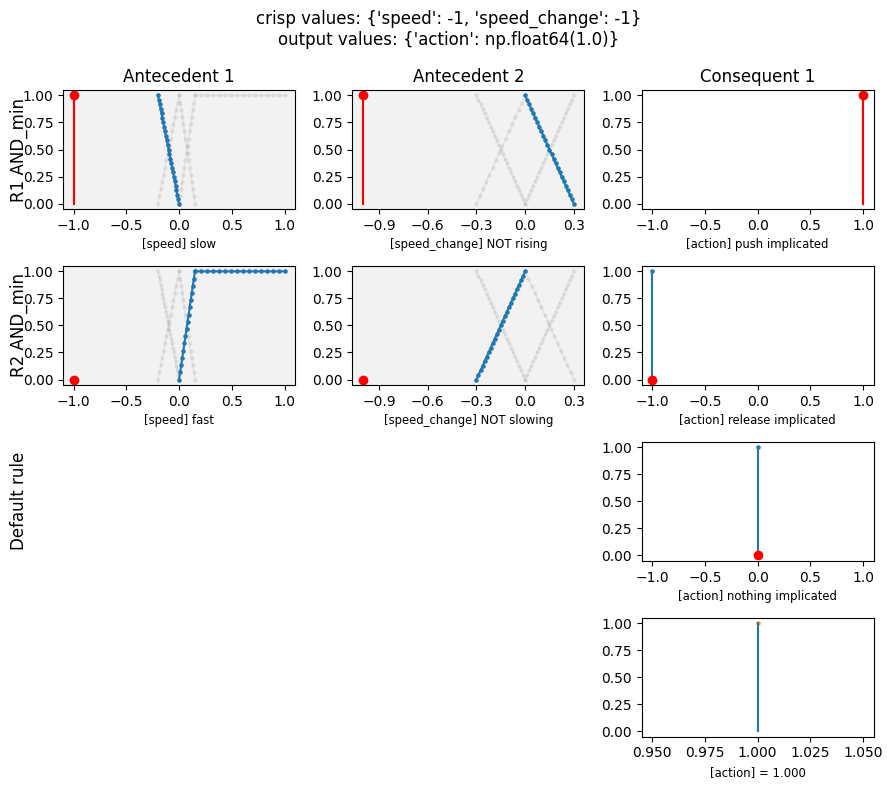

In [17]:
# Your code here
fis = SingletonFIS(rules=car_rules, default_rule = default_car_rule)

# data point
input_values = {'speed': -1, 'speed_change': -1}
# prediction
fis.predict(input_values)
# visualisation
fisv = FISViewer(fis)
fisv.show()

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /5 </b>
</div>

Commentaires: 

FIN